#####
Model: Peptide 
Bmax: 0.42476451043485264 
Kd: 251.99979723138193


<Figure size 1008x360 with 0 Axes>

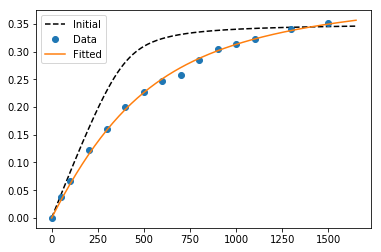

#####
Model: S15 
Bmax: 0.018952867433365578 
Kd: 13.359316020203586


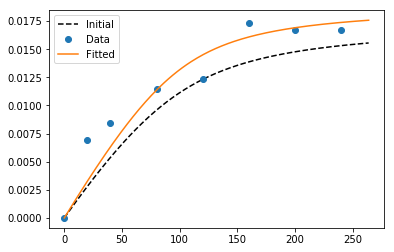

#####
Model: S19 
Bmax: 0.01780927239190685 
Kd: 29.327026213103238


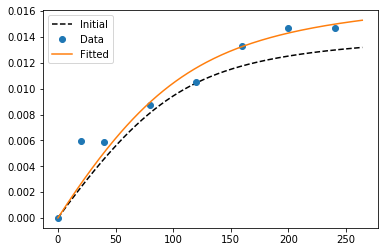

#####
Model: H20 
Bmax: 0.03642010331704214 
Kd: 36.93358043724693


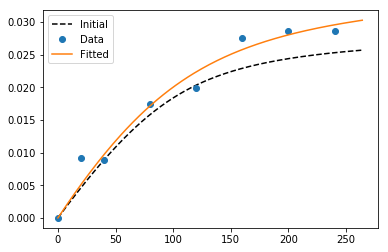

#####
Model: G22 
Bmax: 0.02697081113682472 
Kd: 23.40767359451133


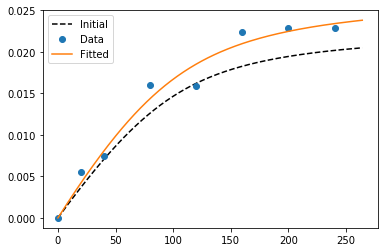

In [1]:
import numpy as np
import scipy.optimize as opt
import math
import matplotlib.pyplot as plt
%matplotlib inline



def f(x, Bmax, Kd):
    return Bmax*(x+P+Kd - ((x+P+Kd)**2-4*x*P)**0.5 )/(2*P)

#Full-length
L2=[0,20,40,80,120,160,200,240]
P1=400
P2=100
L1 = [0,50,100,200,300,400,500,600,700,800,900,1000,1100,1300,1500,]
peptide = [0,0.03741992,0.066442221,0.122968877,0.161146405,0.199323718,0.227588295,0.246682794,0.258270374,0.284859804,0.303954136,0.31313623,0.322318249,0.341400836,0.351313041,]
S15=[0,0.006967946,0.00840348,0.011446696,0.01236336,0.017344618,0.016704581,0.016704581]
S19=[0,0.005985032,0.005846176,0.008718122,0.010534092,0.013285423,0.014703151,0.014703151,]
H20=[0,0.009243746,0.008844104,0.017444983,0.019912286,0.027592263,0.028617372,0.028617372,]
G22=[0,0.005582591,0.00747567,0.015971052,0.015938597,0.022378434,0.02283083,0.02283083,]


Pval = [P1,P2,P2,P2,P2]
Ligs = ["Peptide","S15","S19","H20","G22"]
Ligands=[peptide,S15,S19,H20,G22]
Conc = [L1, L2, L2, L2, L2]

plt.figure(figsize=(14, 5))

for index, ligand in enumerate(Ligands):
    # Levenberg-Marquardt algorithm for nonlinear least squares curve fitting
    L=Conc[index]
    yy=Ligands[index]
    P=Pval[index]
    
    Kd = 20
    Bmax = max(yy)
    n = 200
    x = np.linspace(0., L[-1]*1.1, n)
    y_model = f(x, Bmax, Kd)
    y=y_model
    #print(y)
    (Bmax_, Kd_), _ = opt.curve_fit(f, L, yy)
    print('#####\nModel:', Ligs[index], '\nBmax:', Bmax_, '\nKd:', Kd_)
    y_fit = f(x, Bmax_, Kd_)
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(x, y_model, '--k', label="Initial")
    ax.plot(L, yy, 'o', label="Data")
    ax.plot(x, y_fit, '-', label="Fitted")
    
    plt.legend(loc="best")
    plt.show()